<h1 style="text-align: center;">System Step Response Using Convolution</h1>
<p style="text-align: center;">Lab 4</p>
<p style="text-align: center;">Spring 2025</p>

### 1. Purpose 
Become familiar with using convolution to compute a system's step response.  

### 2. Deliverables Overview 
##### Part 1  
[ ] Plots for **Task 2**.  
  
##### Part 2
[ ] Plots for **Task 1**.  
[ ] Hand calculated convolution integrals from **Task 2**.  
[ ] Plots for **Task 2**.  

### 3. Part 1
##### 3.1 Purpose
Use the step function you coded previously to operate on given transfer functions.  
##### 3.2 Tasks
1. Create the following signals with user-defined functions.  
$$h_1(t) = e^{2t}u(1 - t)$$  
$$h_2(t) = u(t - 2) - u(t - 6)$$  
$$h_3(t) = \cos{(\omega_0 t)}u(t)$$ for, $f_0 = 0.25$ Hz.  

In [19]:
#Insert all necessary imports here
import numpy as np
import matplotlib.pyplot as plt


In [20]:
#Insert your step and convolution functions here
def stepF(t):
    '''
    Step Function u(t)

    Input: t - time vector

    Output: Returns 1 for t >= 0, 0 for t < 0
    '''
    y = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] >= 0:
            y[i] = 1
        else:
            y[i] = 0
    return y

def convolveF(f, g):
    '''
    ConvolveF: Performs convolution of input functions f(t) and g(t)

    Inputs:
    f - Array of values from f(t)
    g - Array of values from g(t)

    Output:
    y - Convolution of f(t) and g(t) | (f * g)(t)
    
    '''
    f_len = len(f) 
    g_len = len(g)
    
    f_ex = np.append(f, np.zeros((1,g_len-1)))
    g_ex = np.append(g, np.zeros((1,f_len-1)))
                    
    y = np.zeros(f_ex.shape)
    
    for i in range(f_len + g_len - 1):
        y[i] = 0
        for j in range(f_len):
            if (i - j >= 0) and (i - j < g_len):
                y[i] += (f_ex[j] * g_ex[i-j])
                
    return y

In [21]:
#Insert the code for the transfer functions here

def hF1(t):
    '''
    h1(t): Exponential growth function beginning at t=1s with an exponent coefficient of 2
    
    Input: t - time vector
    
    Output: exp(2t)u(t-1)
    '''
    return np.exp(2*t) * stepF(1-t)

def hF2(t):
    '''
    h2(t): A rectangular pulse from t=2s to t=6s
    
    Inputs: t - time vector
    
    Output: u(t-2) - u(t-6)
    '''

    return  stepF(t-2) - stepF(t-6)

def hF3(t):
    '''
    h3(t): A sinusoidal signal occuring after t=0s at f = 0.25 Hz
    
    Input: 
    t - time vector

    Output: cos(w_o*t)u(t)
    '''

    w_o = 2*np.pi*0.25
    return np.cos(w_o*t) * stepF(t)

2. Plot the three functions in a single figure (separate subplots) from $-10 \le t \le 10$ with time steps small enough to achieve appropriate resolution. 

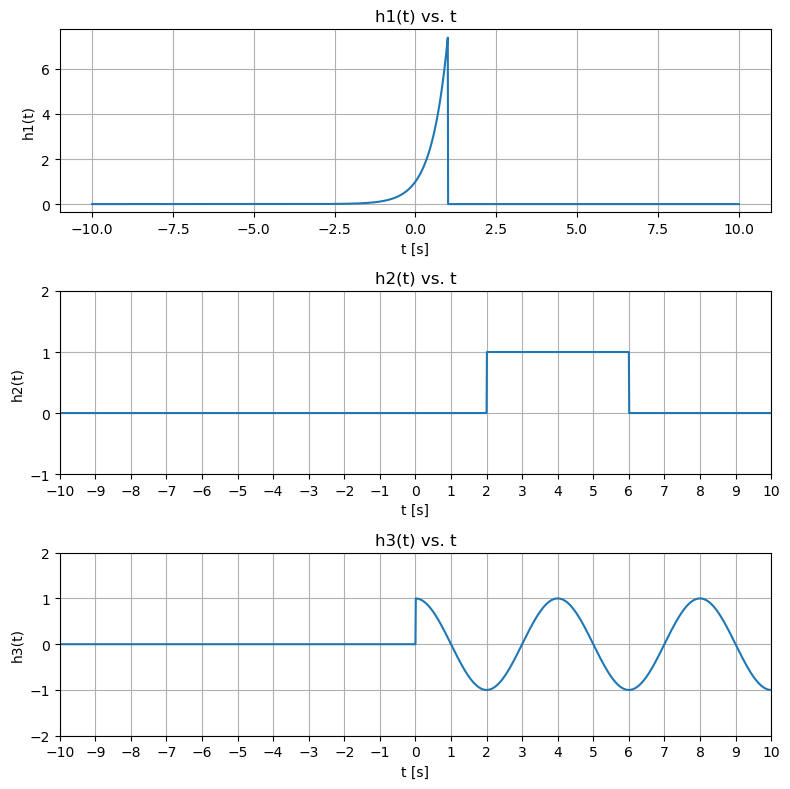

In [23]:
#Insert code calling and plotting the transfer functions in one figure with three subplots here

step = 1e-2
t = np.arange(-10, 10 + step, step)

y = hF1(t)

plt.figure(figsize=(8,8))
plt.subplot(3, 1, 1)
plt.plot(t, y)
plt.grid()
plt.ylabel("h1(t)")
plt.xlabel("t [s]")
plt.title("h1(t) vs. t")


y = hF2(t)

plt.subplot(3, 1, 2)
plt.plot(t, y)
plt.grid()
plt.ylabel("h2(t)")
plt.xlabel("t [s]")
plt.title("h2(t) vs. t")
plt.xticks(np.arange(min(t), max(t) + 1, 1))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 1))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])

y =  hF3(t)

plt.subplot(3, 1, 3)
plt.plot(t, y)
plt.grid()
plt.ylabel("h3(t)")
plt.xlabel("t [s]")
plt.title("h3(t) vs. t")
plt.xticks(np.arange(min(t), max(t) + 1, 1))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 1))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])
plt.tight_layout()
plt.show()

### 4. Part 2
##### 4.1 Purpose
Find and plot the step response of the three transfer functions defined in **Part 1** using Python and hand calculations.
##### 4.2 Tasks
Perform the following tasks for each of the three transfer functions defined in **Part 1**. Plot each response from $-10 \le t \le 10$ with an appropriate step size.  
1. Plot the step response using your convolution and step functions created earlier.

In [25]:
#Insert code performing the step response for all three transfer functions here

step = 1e-2
t = np.arange(-10, 10 + step, step)
t_conv = np.arange(2*t[0], 2*t[len(t)-1] + step, step)

h1 = hF1(t)
h2 = hF2(t)
h3 = hF3(t)
u = stepF(t)

y1 = convolveF(h1, u)*step
y2 = convolveF(h2, u)*step
y3 = convolveF(h3, u)*step

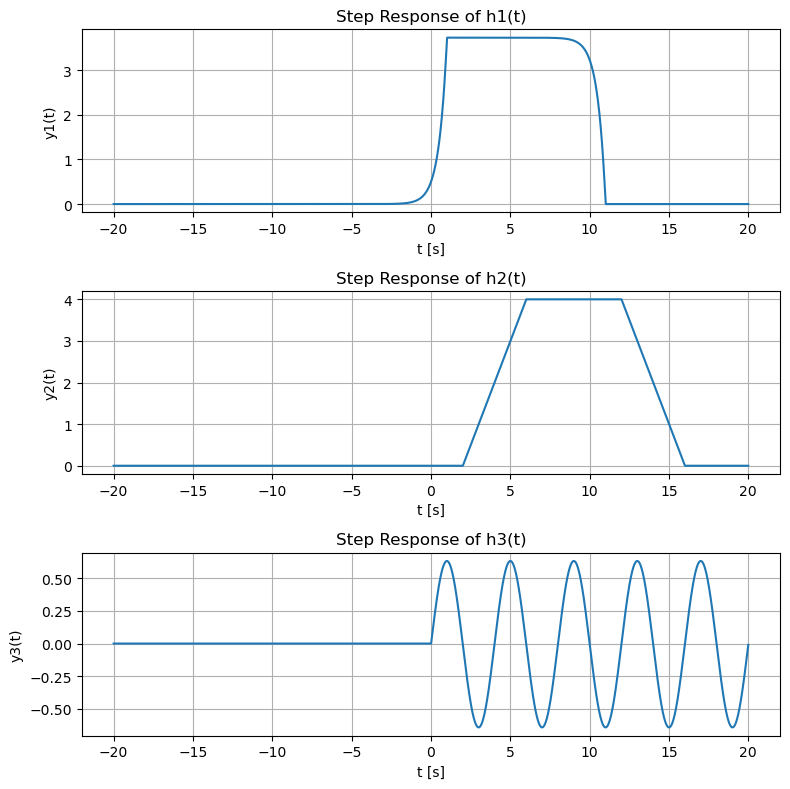

In [26]:
#Insert code plotting all three step responses in one figure with three subplots here

plt.figure(figsize=(8,8))
plt.subplot(3, 1, 1)
plt.plot(t_conv, y1)
plt.grid()
plt.ylabel("y1(t)")
plt.xlabel("t [s]")
plt.title("Step Response of h1(t)")


plt.subplot(3, 1, 2)
plt.plot(t_conv, y2)
plt.grid()
plt.ylabel("y2(t)")
plt.xlabel("t [s]")
plt.title("Step Response of h2(t)")

plt.subplot(3, 1, 3)
plt.plot(t_conv, y3)
plt.grid()
plt.ylabel("y3(t)")
plt.xlabel("t [s]")
plt.title("Step Response of h3(t)")

plt.tight_layout()
plt.show()

2. By hand, calculate the step response of each transfer function by solving the convolution integral. Plot the results and ensure they match the plots from **Task 1**. *Note: Recall for this class all math must be done symbolically not numerically.*

>Insert your hand calculated integrals here. Show all necessary work and write them using LaTeX math mode.\
>$\begin{align*} 
y_1 &= \int_{-\infty}^{\infty} e^{2(\tau)}u(1-\tau)u(t-\tau)d\tau \\[1em]
&\implies \int_{-\infty}^{t} e^{-2\tau}u(1-t)d\tau + \int_{-\infty}^{1} e^{-2\tau}u(t-1)d\tau \\[1em]
&\implies \frac{1}{2}*[\left.e^{2\tau}u(1-\tau)\right|_{-\infty}^{t} + \left.e^{2\tau}u(\tau-1)\right|_{-\infty}^{1}] \\[1em]
&\implies \frac{1}{2}[e^{2t}u(1-t) + e^{2}u(t-1)] \\[1em]
&\implies y_1 = \frac{1}{2}e^{2t}u(1-t) + \frac{1}{2}e^{2}u(t-1) \\[1em]
\end{align*}$


>$\begin{align*} 
y_2 &= \int_{-\infty}^{\infty}[u(\tau-2)-u(\tau-6)]u(t-\tau)d\tau \\[1em]
&\implies \int_{-\infty}^{\infty}u(\tau-2)u(t-\tau)d\tau - \int_{-\infty}^{\infty}[u(\tau-6)u(t-\tau)d\tau \\[1em]
&\implies \int_{2}^{t}1d\tau - \int_{6}^{t}1d\tau \\[1em]
&\implies \left.\tau\right|_{2}^{t}u(t-2)-\left.\tau\right|_{6}^{t}u(t-6) \\[1em]
&\implies y_1 = [t-2]u(t-2) - [t-6]u(t-6) \\[1em]
\end{align*}$


>$\begin{align*} 
y_3 &= \int_{-\infty}^{\infty} cos(\omega_o\tau)u(\tau)u(t-\tau)d\tau \\[1em]
&\implies \int_{0}^{t} cos(\omega_o\tau)d\tau \\[1em]
&\text{Let } v = \omega_o\tau \\
&\text{Then } \frac{1}{\omega_o}dv=d\tau \\[1em]
&\implies \frac{1}{\omega_o}\int_{v_a}^{v_b} cos(v)dv \\[1em]
&\implies \left.\frac{1}{\omega_o}sin(v)\right|_{v_a}^{v_b} \\[1em]
&\implies \left.\frac{1}{\omega_o}sin(\omega_o\tau)\right|_{0}^{t}u(t) \\[1em]
&\implies y_3 = \frac{1}{\omega_o}sin(\omega_ot)u(t) \\[1em]
\end{align*}$




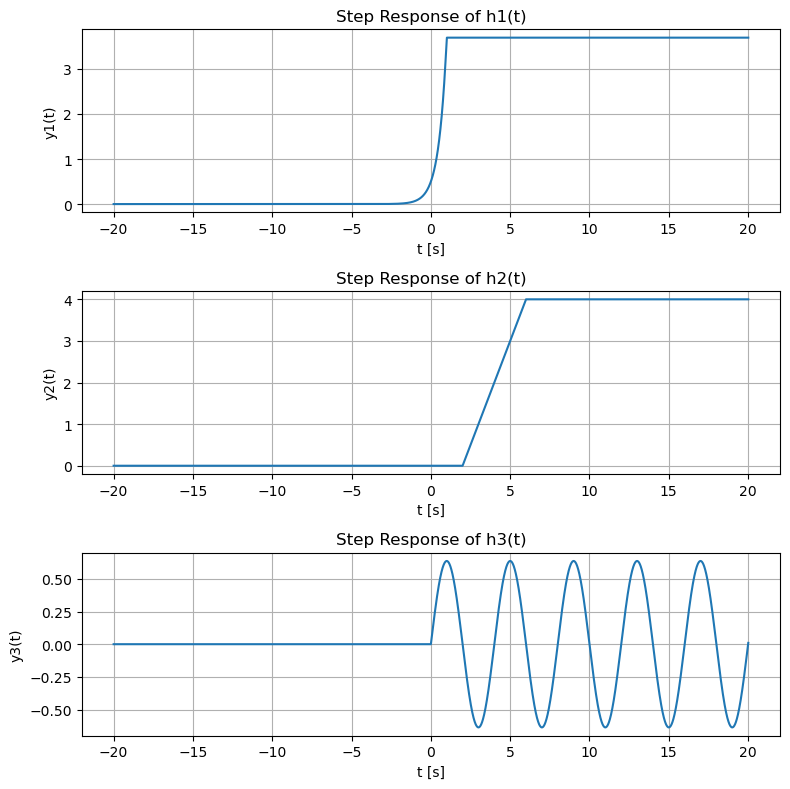

In [38]:
#Insert code plotting your hand calculated step responses in one figure with three subplots here. 
#Note: These won't look exactly like the plots from earlier because a computer has no concept of infinity
step = 1e-2
t = np.arange(-20, 20 + step, step)

y1 = 0.5*np.exp(2*t)*stepF(1-t) + 0.5*np.exp(2)*stepF(t-1)

y2 = (t-2)*stepF(t-2)-(t-6)*stepF(t-6)

w_o = 2*np.pi*0.25
y3 = (1/w_o)*np.sin(w_o*t)*stepF(t)

plt.figure(figsize=(8,8))
plt.subplot(3, 1, 1)
plt.plot(t, y1)
plt.grid()
plt.ylabel("y1(t)")
plt.xlabel("t [s]")
plt.title("Step Response of h1(t)")


plt.subplot(3, 1, 2)
plt.plot(t, y2)
plt.grid()
plt.ylabel("y2(t)")
plt.xlabel("t [s]")
plt.title("Step Response of h2(t)")

plt.subplot(3, 1, 3)
plt.plot(t, y3)
plt.grid()
plt.ylabel("y3(t)")
plt.xlabel("t [s]")
plt.title("Step Response of h3(t)")

plt.tight_layout()
plt.show()

### 5. Questions
1. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>